In [1]:
%matplotlib inline
import requests
from requests.exceptions import TooManyRedirects, ReadTimeout, ConnectionError
import urllib.request
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Output directory for images
OUTDIR='data'

# List of images to retrieve
link = 'http://www.image-net.org/api/text/imagenet.synset.geturls?wnid=n04606574'


In [2]:
# Retrive a list of images
myfile = requests.get(link) 

In [3]:
def downloader(image_url, image_name):
    try:
        r = requests.get(image_url, stream=True, timeout=1)
        if r.status_code == 200:
            # print(r.headers['content-type'])
            if r.headers['content-type'].startswith("image"):
                if not r.url.endswith('photo_unavailable.png'):
                    print(f"{image_url} -> {image_name}")
                    with open(image_name, 'wb') as fd:
                        for chunk in r.iter_content(chunk_size=128):
                            fd.write(chunk)
                    return image_name
                else:
                    print("SKIP: photo_unavailable.png")
            else:
                print("SKIP: content header didn't start with 'image': {}".format(r.headers['content-type']))
        else:
            print("SKIP: Problem downloading, status code: {}".format(r.status_code))
    except TooManyRedirects:
        print("SKIP: TooManyRedirects")
    except ReadTimeout:
        print("SKIP: ReadTimeout")
    except ConnectionError:
        print("SKIP: ConnectionError")
    
    return None
    

In [4]:
MAX_IMAGES = 3
images = []
for count, i in enumerate(myfile.text.split("\r\n")):
    image_name = os.path.join(OUTDIR, "image_"+str(count)+".jpg")
    path = downloader(i, image_name)
    if path is not None:
        images.append(path)
    if (len(images) >= MAX_IMAGES):
        break

SKIP: content header didn't start with 'image': text/html; charset=utf-8
http://farm3.static.flickr.com/2035/2458902835_c171d55306.jpg -> data/image_1.jpg
SKIP: Problem downloading, status code: 404
SKIP: content header didn't start with 'image': text/html; charset=utf-8
SKIP: content header didn't start with 'image': text/html; charset=utf-8
SKIP: Problem downloading, status code: 404
SKIP: Problem downloading, status code: 404
SKIP: Problem downloading, status code: 404
http://i20.ebayimg.com/02/i/000/81/65/641d_2.JPG -> data/image_8.jpg
SKIP: Problem downloading, status code: 404
SKIP: Problem downloading, status code: 404
SKIP: Problem downloading, status code: 404
SKIP: content header didn't start with 'image': text/html; charset=UTF-8
SKIP: content header didn't start with 'image': text/html;charset=UTF-8
SKIP: Problem downloading, status code: 404
SKIP: Problem downloading, status code: 404
SKIP: Problem downloading, status code: 404
http://farm3.static.flickr.com/2082/214067601

data/image_1.jpg


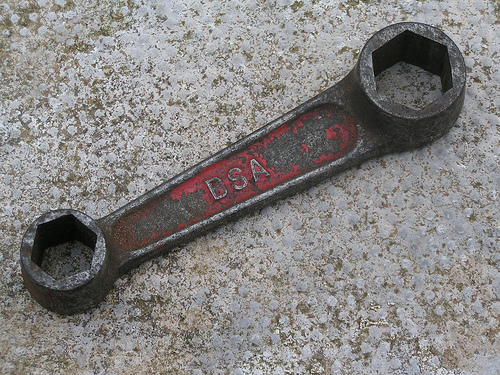

data/image_8.jpg


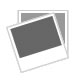

data/image_17.jpg


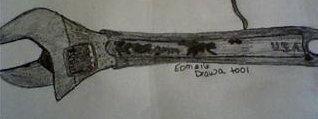

In [5]:
from IPython.display import Image, display
for image_path in images:
    print(image_path)
    x = Image(filename=image_path)
    display(x)